# k-NN Classification

In the following diagram let blue circles indicate positive examples and orange squares indicate negative examples. We want to use k-NN algorithm for classifying the points. If k=3, find the class of the point (6,6). Extend the same example for Distance-Weighted k-NN and Locally weighted Averaging.

In [8]:
import math
import matplotlib.pyplot as plt

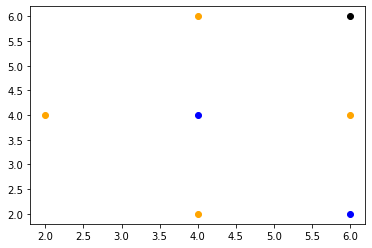

In [15]:
x_train = [[2 ,4], [4, 4], [4, 6], [4, 2], [6, 2], [6, 4]]
y_train = ["Orange", "Blue", "Orange", "Orange", "Blue", "Orange"]
test_data = [[6,6]]

for coords, color in zip(x_train, y_train):
		plt.scatter(coords[0], coords[1], c=color)
plt.scatter(test_data[0][0], test_data[0][1], c="black")

In [3]:
class KNN:
  def __init__(self, k:int = 2, algorithm = 'auto'):
    self.k = k
    self.x = []
    self.y = []
    self.algorithm = algorithm
  
  def fit(self, x, y):
    self.x, self.y = x, y

  def get_distance(self, p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt(
        (x1-x2)**2 + (y2-y1)**2
    )

  def auto_knn(self, distances):
    return max((distances), key = lambda tup: tup[1])[1]

  def weighted_knn(self, distances, local: bool = False):
    frequencies = {}
    weights = {}

    for d in distances:
      weights[d[1]] = weights.get(d[1], 0.0) + float(1/d[0])
      frequencies[d[1]] = frequencies.get(d[1], 0) + 1
    
    if local:
      for w in weights:
        weights[w] /= frequencies[w]
    
    return max((weights), key = lambda x: weights[x])

  
  def distance_weighted_knn(self, distances):
    return self.weighted_knn(distances)

  def locally_weighted_averaging_knn(self, distances):
    return self.weighted_knn(distances, local=True)

  def predict(self, tests):
    results = []
    
    for test in tests:
      distances = []
      
      for i in range(len(self.x)):
        distances.append([
                          self.get_distance(self.x[i], test),
                          self.y[i]
        ])
      
      distances.sort(key = lambda tup: tup[0])
      distances = distances[:self.k]
      print("Nearest Neighbors: ", distances)

      results.append(
        # Calls the _knn functions in this class
          getattr(self, self.algorithm + '_knn')(distances)
      )
    
    return results



Basic kNN

In [4]:
n = KNN(3)
n.fit(x_train, y_train)
print(n.predict(test_data))

Nearest Neighbors:  [[2.0, 'Orange'], [2.0, 'Orange'], [2.8284271247461903, 'Blue']]
['Orange']


Distance Weighted kNN

In [5]:
n = KNN(3, 'distance_weighted')
n.fit(x_train, y_train)
print(n.predict(test_data))

Nearest Neighbors:  [[2.0, 'Orange'], [2.0, 'Orange'], [2.8284271247461903, 'Blue']]
['Orange']


Locally Weighted Averaging kNN

In [6]:
n = KNN(3, 'locally_weighted_averaging')
n.fit(x_train, y_train)
print(n.predict(test_data))

Nearest Neighbors:  [[2.0, 'Orange'], [2.0, 'Orange'], [2.8284271247461903, 'Blue']]
['Orange']
